In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
result_df = pd.read_csv('VAE-CF.csv', sep='\t', encoding='utf-8')
result_df = result_df[100:]
result_df = result_df.reset_index(drop=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [3]:
column = ['active_learning_model', 'rec_model', 'sampling', 'active_learning_iteration', 
          'Clicks', 'MAP@1', 'Precision@1', 'Recall@1', 'NDCG', 'R-Precision', 'Num_Ones_In_Train', 
          'Num_Ones_In_Prediction', 'total_num_active_learning_iteration', 
          'Num_Ones_In_Test', 'Num_Zeros_In_Prediction', 
          'rank', 'alpha', 'lambda', 'iter', 'corruption', 'root']

In [4]:
result_df = result_df[column]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [5]:
result_df.rename(columns={'active_learning_model':'Active Learning Model',
                          'rec_model':'Recommendation Model',
                          'sampling':'Sampling',
                          'active_learning_iteration':'Active Learning Iteration',
                          'Num_Ones_In_Train':'Total Number of Positive Ratings Discovered So Far',
                          'Num_Ones_In_Prediction':'Number of Positive Ratings Discovered in Each Iteration',
                          'total_num_active_learning_iteration':'Total Number of Active Learning Iterations',
                          'Num_Ones_In_Test':'Total Number of Positive Ratings in Test Set',
                          'Num_Zeros_In_Prediction':'Number of Hits Missed in Each Iteration ',
                         }, 
                 inplace=True)

In [6]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [7]:
def extract_mean(metric_result):
    parentheses_index = metric_result.find('(')
    comma_index = metric_result.find(',')
    return np.float64(metric_result[parentheses_index+1: comma_index])

In [8]:
result_df['Clicks'] = result_df['Clicks'].apply(lambda x: extract_mean(x))
result_df['MAP@1'] = result_df['MAP@1'].apply(lambda x: extract_mean(x))
result_df['Precision@1'] = result_df['Precision@1'].apply(lambda x: extract_mean(x))
result_df['Recall@1'] = result_df['Recall@1'].apply(lambda x: extract_mean(x))
result_df['NDCG'] = result_df['NDCG'].apply(lambda x: extract_mean(x))
result_df['R-Precision'] = result_df['R-Precision'].apply(lambda x: extract_mean(x))

In [9]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df)

In [10]:
result_df_sampling_false = result_df[result_df['Sampling'] == False]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_sampling_false)

In [11]:
result_df_sampling_true = result_df[result_df['Sampling'] == True]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result_df_sampling_true)

In [12]:
sns.set_style("ticks")

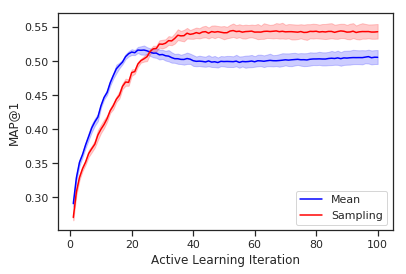

In [13]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="MAP@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="MAP@1", color="red", data=result_df_sampling_true, label="Sampling")

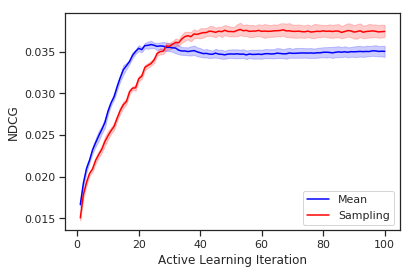

In [14]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="NDCG", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="NDCG", color="red", data=result_df_sampling_true, label="Sampling")

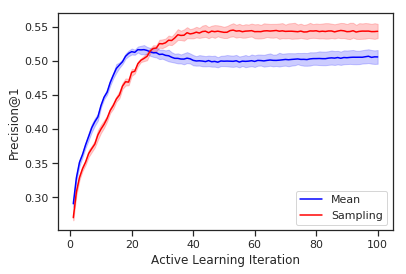

In [15]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Precision@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Precision@1", color="red", data=result_df_sampling_true, label="Sampling")

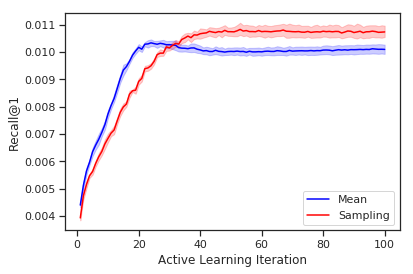

In [16]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Recall@1", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Recall@1", color="red", data=result_df_sampling_true, label="Sampling")

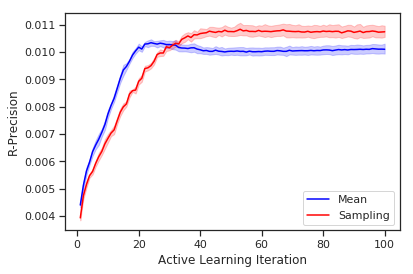

In [17]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="R-Precision", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="R-Precision", color="red", data=result_df_sampling_true, label="Sampling")

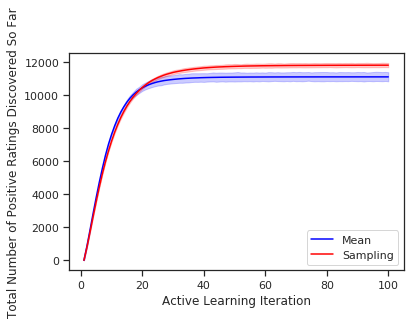

In [18]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="Active Learning Iteration", y="Total Number of Positive Ratings Discovered So Far", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Total Number of Positive Ratings Discovered So Far", color="red", data=result_df_sampling_true, label="Sampling")

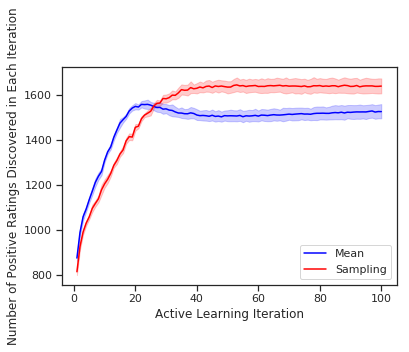

In [19]:
fig, ax = plt.subplots()

ax = sns.lineplot(x="Active Learning Iteration", y="Number of Positive Ratings Discovered in Each Iteration", color="blue", data=result_df_sampling_false, label="Mean")
ax = sns.lineplot(x="Active Learning Iteration", y="Number of Positive Ratings Discovered in Each Iteration", color="red", data=result_df_sampling_true, label="Sampling")